In [2]:
#import libraries
import pandas as pd
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#preprocessing
# Load the dataset
dataset = pd.read_csv('/content/Tweets.csv')

# Select the 'text' column for preprocessing
text_column = 'text'

# Remove noise and irrelevant information
dataset[text_column] = dataset[text_column].apply(lambda x: re.sub(r"http\S+|www\S+|@\S+|#\S+", "", x))

# Lowercase the text
dataset[text_column] = dataset[text_column].str.lower()

# Tokenization
dataset['tokens'] = dataset[text_column].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
dataset['tokens'] = dataset['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
dataset['tokens'] = dataset['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Print the preprocessed dataset
print(dataset.head())


             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [4]:
#sentimentclassification.
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each tweet
dataset['sentiment_score'] = dataset['tokens'].apply(lambda x: sia.polarity_scores(' '.join(x))['compound'])

# Classify sentiment based on the sentiment score
dataset['sentiment'] = dataset['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Print the updated dataset
print(dataset[['text', 'sentiment']])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                    text sentiment
0                                            what  said.   neutral
1       plus you've added commercials to the experien...   neutral
2       i didn't today... must mean i need to take an...   neutral
3       it's really aggressive to blast obnoxious "en...  negative
4               and it's a really big bad thing about it  negative
...                                                  ...       ...
14635   thank you we got on a different flight to chi...  positive
14636   leaving over 20 minutes late flight. no warni...  negative
14637                 please bring american airlines to   positive
14638   you have my money, you change my flight, and ...  positive
14639   we have 8 ppl so we need 2 know how many seat...  positive

[14640 rows x 2 columns]


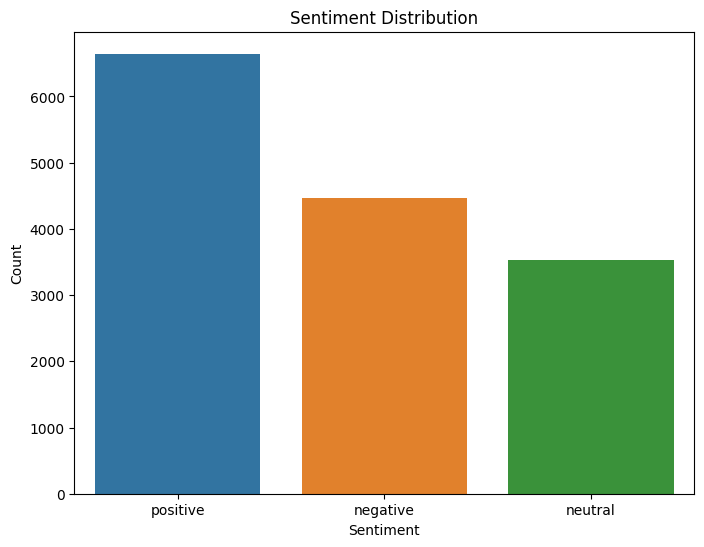

In [5]:
#Sentiment Distribution Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment category
sentiment_counts = dataset['sentiment'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

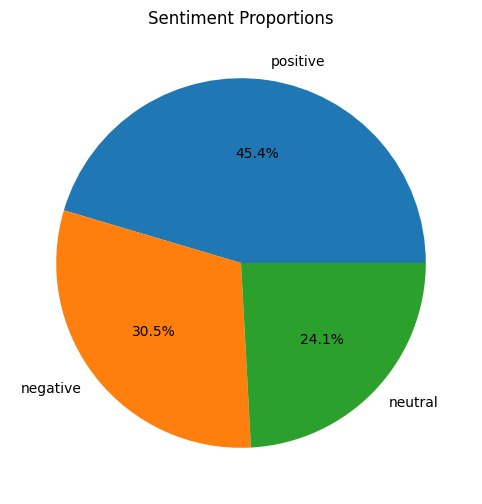

In [6]:
#Sentiment Proportions:
import matplotlib.pyplot as plt

# Calculate the total number of tweets
total_tweets = len(dataset)

# Calculate the sentiment proportions
sentiment_proportions = dataset['sentiment'].value_counts() / total_tweets

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_proportions.values, labels=sentiment_proportions.index, autopct='%1.1f%%')
plt.title('Sentiment Proportions')
plt.show()

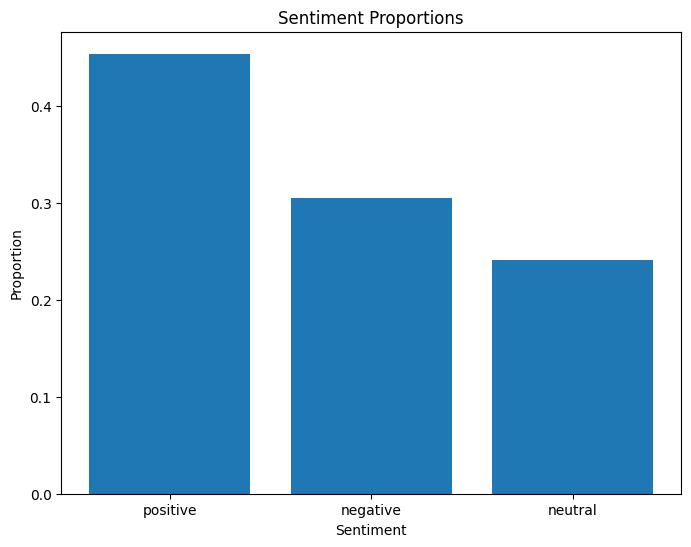

In [7]:
plt.figure(figsize=(8, 6))
plt.bar(sentiment_proportions.index, sentiment_proportions.values)
plt.title('Sentiment Proportions')
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.show()

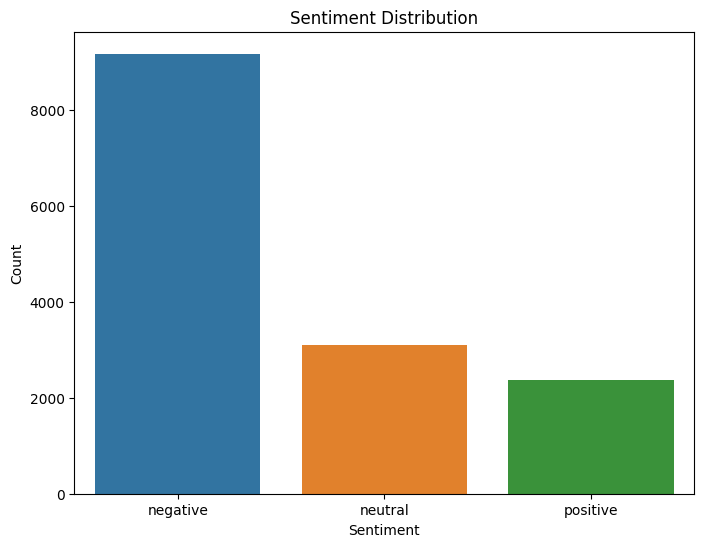

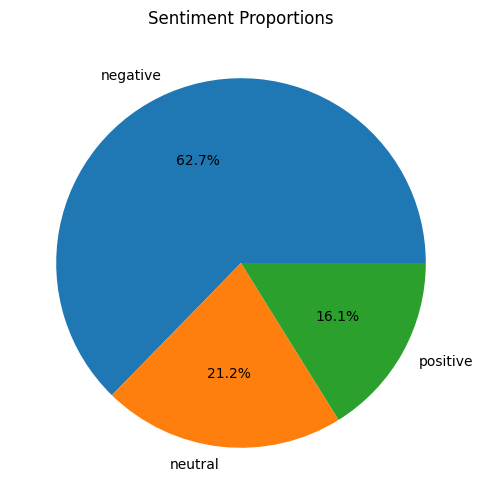

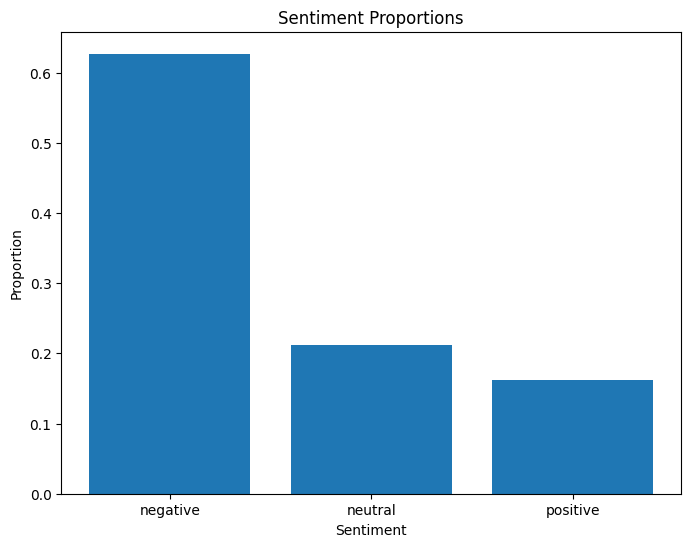

In [11]:
#Explore Word Clouds
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment category
sentiment_counts = dataset['airline_sentiment'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#  total number of tweets
total_tweets = len(dataset)

# Calculat sentiment proportions
sentiment_proportions = dataset['airline_sentiment'].value_counts() / total_tweets

#  pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_proportions.values, labels=sentiment_proportions.index, autopct='%1.1f%%')
plt.title('Sentiment Proportions')
plt.show()

#  bar chart
plt.figure(figsize=(8, 6))
plt.bar(sentiment_proportions.index, sentiment_proportions.values)
plt.title('Sentiment Proportions')
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.show()



In [10]:
print(dataset.columns)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [14]:
#aspect-Based Sentiment Analysis
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Example function to determine sentiment using SentimentIntensityAnalyzer
def determine_sentiment(tokens):
    sentiment_scores = sia.polarity_scores(' '.join(tokens))
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Define aspects of interest
aspects = ['service', 'price', 'quality', 'delivery']

# Initialize sentiment scores for each aspect
aspect_sentiments = {aspect: {'positive': 0, 'negative': 0} for aspect in aspects}

# Perform sentiment analysis for each tweet
for tokens in dataset['tokens']:
    mentioned_aspects = [aspect for aspect in aspects if aspect in tokens]
    for aspect in mentioned_aspects:
        sentiment = determine_sentiment(tokens)
        if sentiment == 'positive':
            aspect_sentiments[aspect]['positive'] += 1
        elif sentiment == 'negative':
            aspect_sentiments[aspect]['negative'] += 1

# Print the aspect sentiment scores
for aspect, sentiment_scores in aspect_sentiments.items():
    print(f"Aspect: {aspect}")
    print(f"Positive count: {sentiment_scores['positive']}")
    print(f"Negative count: {sentiment_scores['negative']}")
    print()
#These counts provide an indication of the sentiment associated with each aspect mentioned in the tweets.

Aspect: service
Positive count: 390
Negative count: 432

Aspect: price
Positive count: 24
Negative count: 17

Aspect: quality
Positive count: 12
Negative count: 1

Aspect: delivery
Positive count: 7
Negative count: 7



# New Section

# New Section